In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [34]:
df = pd.read_csv('area-2018.csv', sep=',', header=2)
df.head(48)


,Date,Time,Demand,Nuclear,Heat,Hydro,Geothermal,Biomass,PV,PV_Curtailment,WG,WG_Curtailment,Pump,Interconnection_Line,sum
0,2018/4/1,0:00,2419,0,1915,153,0,10,0,0,10,0,9,322,2419
1,2018/4/1,1:00,2332,0,1836,149,0,10,0,0,11,0,6,320,2332
2,2018/4/1,2:00,2319,0,1826,157,0,10,0,0,11,0,0,315,2319
3,2018/4/1,3:00,2323,0,1835,155,0,10,0,0,10,0,0,313,2323
4,2018/4/1,4:00,2322,0,1859,156,0,10,0,0,8,0,0,289,2322
5,2018/4/1,5:00,2325,0,1856,154,0,10,0,0,7,0,0,298,2325
6,2018/4/1,6:00,2300,0,1732,145,0,10,70,0,7,0,14,322,2300
7,2018/4/1,7:00,2371,0,1567,148,0,10,304,0,7,0,16,319,2371
8,2018/4/1,8:00,2525,0,1496,148,0,10,565,0,6,0,-14,314,2525
9,2018/4/1,9:00,2625,0,1446,153,0,10,754,0,6,0,-48,304,2625


In [59]:
T_str = 5
T_stp = 24
oneday = df[T_str:T_stp]
demand = df[T_str:T_stp]['Demand']
demand = demand.reset_index(drop=True)
# oneday = oneday.reset_index(drop=True)
oneday.head(5)
# ax = oneday['Demand'].plot(kind='line', legend=True, linewidth=3)

,Date,Time,Demand,Nuclear,Heat,Hydro,Geothermal,Biomass,PV,PV_Curtailment,WG,WG_Curtailment,Pump,Interconnection_Line,sum
5,2018/4/1,5:00,2325,0,1856,154,0,10,0,0,7,0,0,298,2325
6,2018/4/1,6:00,2300,0,1732,145,0,10,70,0,7,0,14,322,2300
7,2018/4/1,7:00,2371,0,1567,148,0,10,304,0,7,0,16,319,2371
8,2018/4/1,8:00,2525,0,1496,148,0,10,565,0,6,0,-14,314,2525
9,2018/4/1,9:00,2625,0,1446,153,0,10,754,0,6,0,-48,304,2625


Text(0, 0.5, 'Power [10^4 kW]')

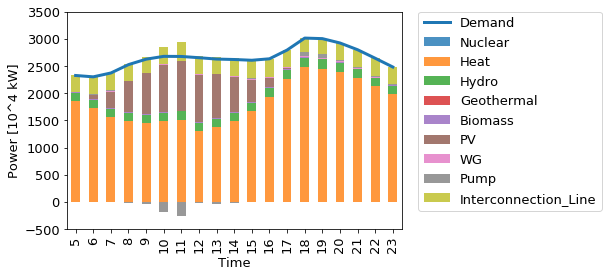

In [60]:
#ax = oneday['Demand'].plot(kind='line', legend=True, linewidth=3)
ax = demand.plot(kind='line', legend=True, linewidth=3)
oneday.plot(kind='bar', y=['Nuclear','Heat','Hydro','Geothermal','Biomass','PV','WG','Pump','Interconnection_Line'], 
            ax=ax, alpha=0.8, stacked=True, fontsize=13)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0, fontsize=13)
plt.ylim(-500, 3500)
plt.xlabel('Time', fontsize=13)
plt.ylabel('Power [10^4 kW]', fontsize=13)


In [61]:
T_str = 5
T_stp = 24
oneday = df[T_str:T_stp]
demand = df[T_str:T_stp]['Demand']
# demand = demand.reset_index(drop=True)
# oneday = oneday.reset_index(drop=True)
# oneday.head(5)
# ax = oneday['Demand'].plot(kind='line', legend=True, linewidth=3)

Text(0, 0.5, 'Power [10^4 kW]')

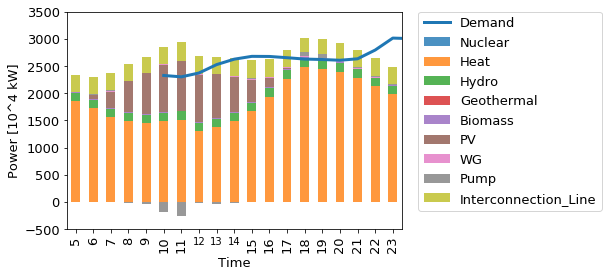

In [62]:
ax = demand.plot(kind='line', legend=True, linewidth=3)
oneday.plot(kind='bar', y=['Nuclear','Heat','Hydro','Geothermal','Biomass','PV','WG','Pump','Interconnection_Line'], 
            ax=ax, alpha=0.8, stacked=True, fontsize=13)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0, fontsize=13)
plt.ylim(-500, 3500)
plt.xlabel('Time', fontsize=13)
plt.ylabel('Power [10^4 kW]', fontsize=13)